**IMPORT**

In [1]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=None

In [3]:
# %load "function.py"

In [243]:
df=pd.read_pickle("autos_20190708.pkl")

**EDA**

In [244]:
drop_list=df.columns[df.isnull().mean() > 0.20]

In [245]:
df.drop(drop_list, axis=1, inplace=True)

In [246]:
df.shape

(15919, 119)

In [149]:
#df.dropna(thresh=60, inplace=True)

In [247]:
df=df.dropna()

In [248]:
df.shape

(6575, 119)

In [9]:
df.head(4)

,co2_emission,displacement,make,model,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,body,body_color,gearing_type,inspection_new,price,short_description,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,first_registration,fuel,nr_of_doors,nr_of_seats,type,warranty,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres
0,99.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013.0,LR-062483,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,True,3.8,Sedans,Black,Automatic,1,15770,Sportback 1.4 TDI S-tronic Xenon Navi Klima,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2016-01-01,Diesel (Particulate Filter),5.0,5.0,Used,1,https://www.autoscout24.com//offers/audi-a1-sp...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,99.0,1598.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450.0,AM-95365,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,False,3.8,Sedans,Black,Automatic,0,14640,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2016-01-01,Diesel (Particulate Filter),4.0,4.0,Used,1,https://www.autoscout24.com//offers/audi-a1-sp...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,109.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,16200.0,C1626,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,4.1,Sedans,Black,Automatic,1,16790,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2016-01-01,Diesel (Particulate F

**FUEL**

In [10]:
df.fuel.value_counts()

Diesel (Particulate Filter)                2391
Super 95                                   1872
Gasoline                                    915
Diesel                                      791
Regular/Benzine 91                          223
Super E10 95                                191
Super 95 (Particulate Filter)               112
Gasoline (Particulate Filter)                43
Regular/Benzine 91 (Particulate Filter)      26
Regular/Benzine E10 91                        5
Super E10 95 (Particulate Filter)             3
Liquid petroleum gas (LPG)                    1
Biogas                                        1
Super Plus 98                                 1
Name: fuel, dtype: int64

In [249]:
df.loc[(df['fuel']=='Diesel (Particulate Filter)'), 'fuel']='Diesel'
df.loc[((df['fuel']=='Super 95') | (df['fuel']=='Regular/Benzine 91')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Super E10 95') | (df['fuel']=='Super 95 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Gasoline (Particulate Filter)') | (df['fuel']=='Regular/Benzine 91 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Regular/Benzine E10 91') | (df['fuel']=='Super E10 95 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[(df['fuel']=='Super Plus 98'), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Biogas') | (df['fuel']=='Liquid petroleum gas (LPG)')), 'fuel']='Biogas/LPG'

In [12]:
df.fuel.value_counts()

Gasoline      3391
Diesel        3182
Biogas/LPG       2
Name: fuel, dtype: int64

In [180]:
df.fuel.nunique()

3

**PRICE**

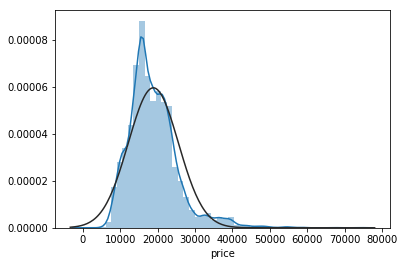

In [14]:
sns.distplot(df.price, fit=norm)

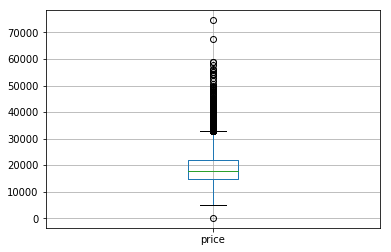

In [15]:
df.boxplot('price')

In [16]:
df.price.sort_values(ascending = True)[:5]

8828      120
8825     4990
13757    5900
13761    5900
13756    5938
Name: price, dtype: int64

In [250]:
df = df.drop([8828])

In [18]:
df.price.sort_values(ascending = True)[:5]

8825     4990
13757    5900
13761    5900
13756    5938
8601     5970
Name: price, dtype: int64

**DROP DOUBLE COLUMNS**

In [251]:
# age and firs registration columns are same
df.drop('first_registration', axis=1, inplace=True)

In [252]:
#body and body_type are same
df.drop(['body_type'], axis=1, inplace=True)

In [21]:
df.dtypes

co2_emission                                float64
displacement                                float64
make                                         object
model                                        object
description                                  object
hp                                          float64
km                                          float64
offer_number                                 object
ss_abs                                      float64
ss_adaptive_cruise_control                  float64
ss_adaptive_headlights                      float64
ss_alarm_system                             float64
ss_blind_spot_monitor                       float64
ss_central_door_lock                        float64
ss_central_door_lock_with_remote_control    float64
ss_daytime_running_lights                   float64
ss_driver_drowsiness_detection              float64
ss_driver_side_airbag                       float64
ss_electronic_stability_control             float64
ss_emergency

In [22]:
# Let's see if there are still "object" type columns to be converted to numeric
df.dtypes[df.dtypes == 'object']

make                 object
model                object
description          object
offer_number         object
body                 object
body_color           object
gearing_type         object
short_description    object
fuel                 object
type                 object
url                  object
dtype: object

In [23]:
df.describe(include = "object")

,make,model,description,offer_number,body,body_color,gearing_type,short_description,fuel,type,url
count,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574
unique,3,7,1,5956,9,12,3,4449,3,5,6574
top,Opel,A3,Sicherheit: Deaktivierung für Beifahrer-Airbag...,JV03654,Sedans,Black,Automatic,SPB 1.6 TDI 116 CV S tronic Sport,Gasoline,Used,https://www.autoscout24.com//offers/opel-insig...
freq,2882,1434,6574,27,3131,1722,3645,35,3390,4613,1


In [253]:
# offer_number has many unique values.(5956). Let's drop it.
df.drop('offer_number', axis=1, inplace=True)

**HEAT MAP**

In [25]:
# designate columns_new that consist of numeric variables.
columns_new=["price", "co2_emission", "km", "consumption_comb",
              "age", "nr_of_doors", "warranty", "hp", "displacement",
        "nr_of_seats"]
df_new=df[columns_new]

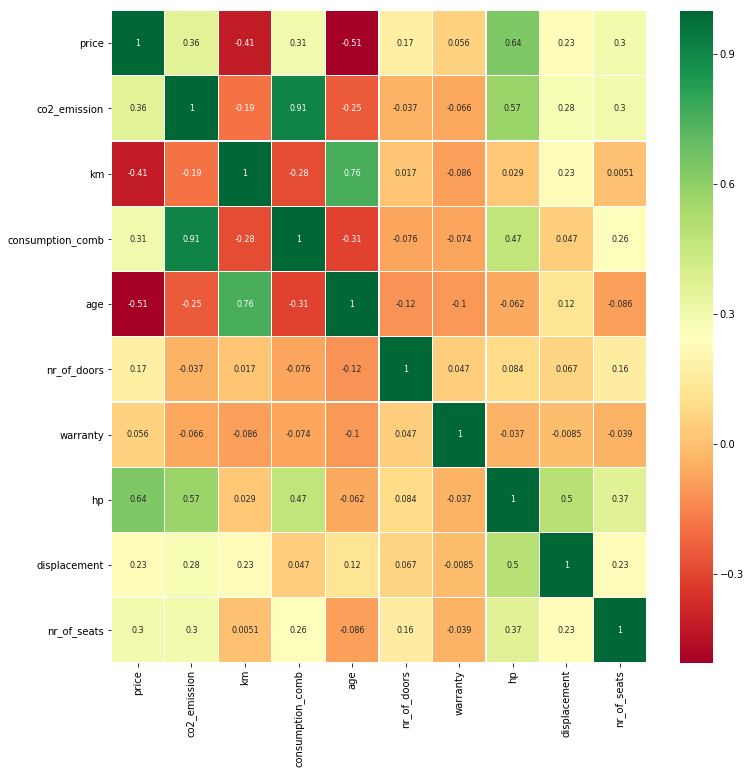

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8})

**PAIR PLOT**

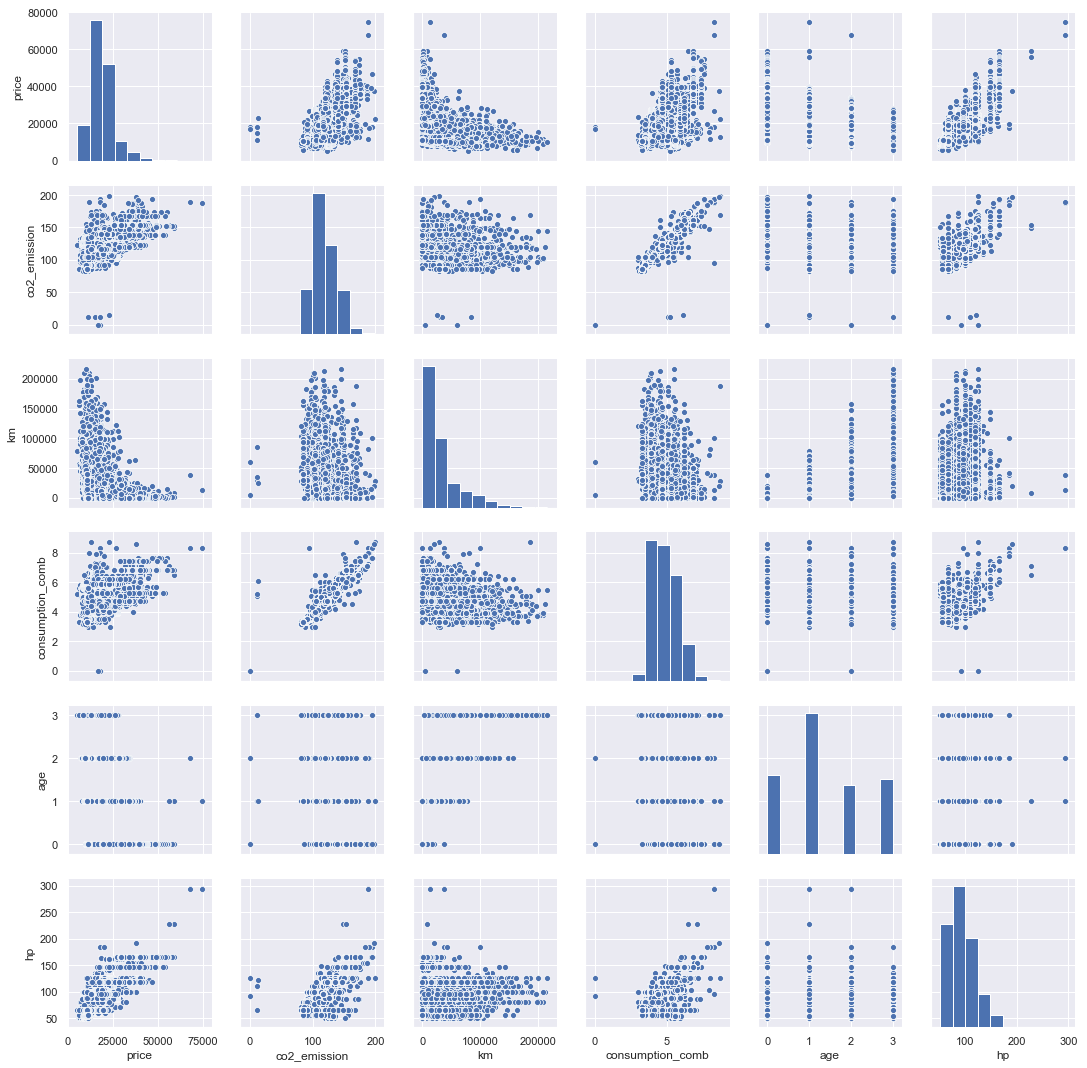

In [27]:
# aqcuire another list of columns called "cals" from important columns of columns_new. 
# And see the scatter plot of these columns.
sns.set()
cols=["price", "co2_emission", "km", "consumption_comb", "age", "hp"]
sns.pairplot(df[cols], size = 2.5)
plt.show()

**CO2 EMISSION**

In [185]:
df.fuel[df.co2_emission<50]

5818     Gasoline
6578     Gasoline
6579     Gasoline
8217     Gasoline
8542     Gasoline
10566      Diesel
11888    Gasoline
Name: fuel, dtype: object

In [254]:
df = df.drop([8217, 10566, 5818, 6578, 6579, 8542, 11888])

In [255]:
df.fuel[df.co2_emission<50]

Series([], Name: fuel, dtype: object)

In [256]:
df.co2_emission.describe()

count    6567.000000
mean      118.597229
std        18.499902
min        82.000000
25%       104.000000
50%       116.000000
75%       130.000000
max       199.000000
Name: co2_emission, dtype: float64

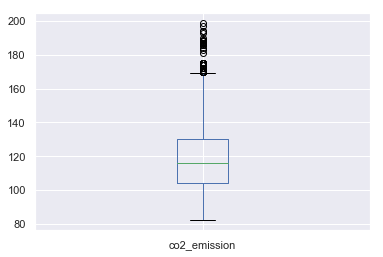

In [32]:
df.boxplot(column='co2_emission')

**HP**

In [33]:
df.hp.describe()

count    6567.000000
mean       91.622354
std        25.594686
min        51.000000
25%        70.000000
50%        85.000000
75%       103.000000
max       294.000000
Name: hp, dtype: float64

In [ ]:
#sdt is very high. Scaling might be considered.

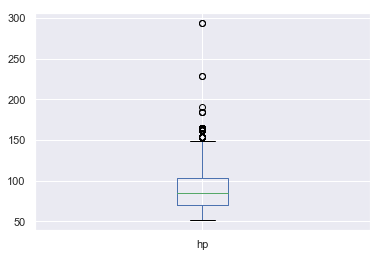

In [34]:
df.boxplot('hp')

**KM**

In [35]:
df.km.describe()

count      6567.000000
mean      30571.438252
std       33637.522141
min           1.000000
25%        5990.000000
50%       21200.000000
75%       40588.000000
max      216560.000000
Name: km, dtype: float64

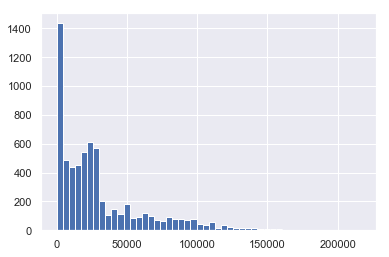

In [36]:
df['km'].hist(bins=50)

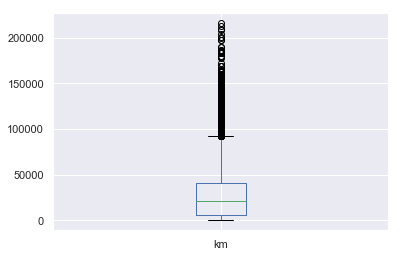

In [37]:
df.boxplot('km')

**AGE**

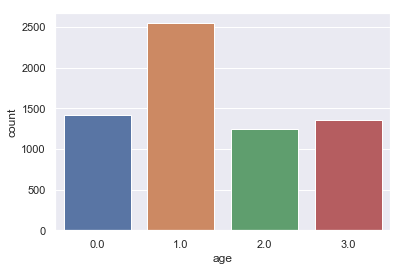

In [257]:
sns.countplot(df.age)

**CONSUMPTION_COMB**

In [39]:
df.consumption_comb.describe()

count    6567.000000
mean        4.846383
std         0.904824
min         3.000000
25%         4.100000
50%         4.700000
75%         5.500000
max         8.700000
Name: consumption_comb, dtype: float64

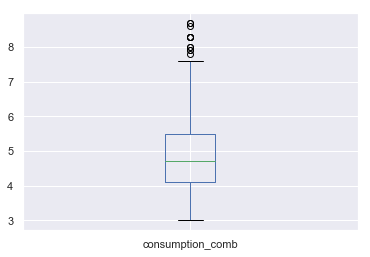

In [40]:
df.boxplot('consumption_comb')

**GEARING TYPE**

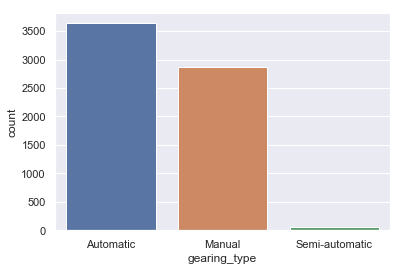

In [41]:
sns.countplot(df.gearing_type)

**MAKE**

In [42]:
df.make.value_counts(dropna=False)

Opel       2875
Audi       2756
Renault     936
Name: make, dtype: int64

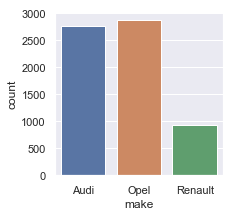

In [43]:
plt.figure(figsize=(3,3))
sns.countplot(df.make)

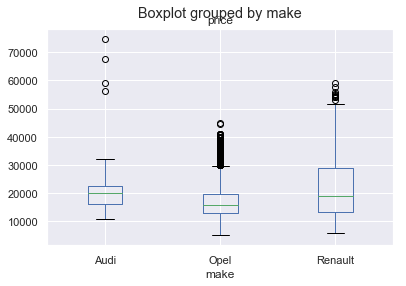

In [44]:
df.boxplot(column='price', by = 'make')

**MODEL**

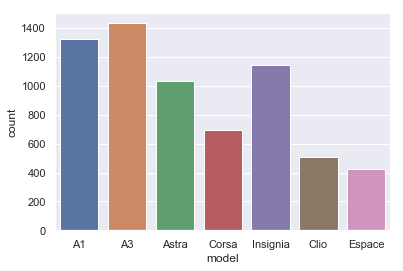

In [45]:
sns.countplot(df.model)

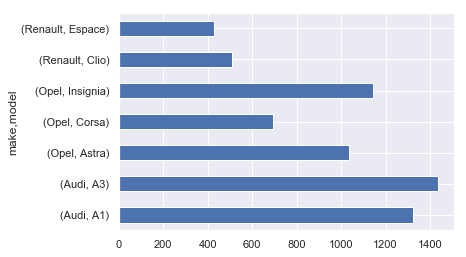

In [46]:
df.groupby(['make', 'model']).size().plot.barh()

**BODY**

In [47]:
df.body.value_counts(dropna=False)

Sedans           3129
Station wagon    1652
Compact          1373
Van               338
Other              47
Transporter        19
Coupe               5
Off-Road            2
Convertible         2
Name: body, dtype: int64

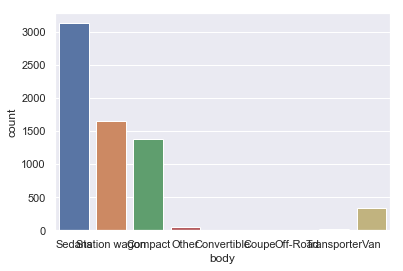

In [48]:
sns.countplot(df.body)

**BODY COLOR**

In [49]:
df.body_color.value_counts(dropna=False)

Black     1721
Grey      1527
White     1226
Silver     772
Blue       596
Red        448
Brown      131
Green       79
Beige       48
Yellow      17
Bronze       1
Violet       1
Name: body_color, dtype: int64

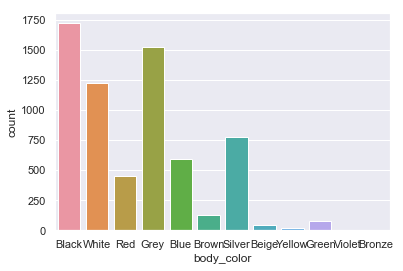

In [50]:
sns.countplot(df.body_color)

**NR_OF_DOORS**

In [51]:
df.nr_of_doors.unique()

array([5., 4., 3., 2.])

In [52]:
df.nr_of_doors.value_counts(dropna=False)

5.0    4505
4.0    1691
3.0     279
2.0      92
Name: nr_of_doors, dtype: int64

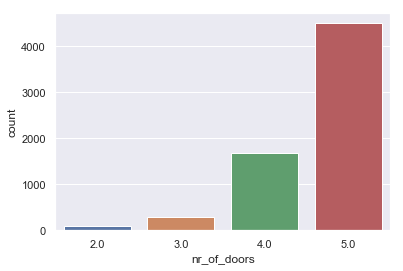

In [53]:
sns.countplot(df.nr_of_doors)

**NR_OF_SEATS**

In [54]:
df.nr_of_seats.unique()

array([5., 4., 3., 2., 7.])

In [55]:
df.nr_of_seats.value_counts(dropna=False)

5.0    5797
4.0     579
7.0     184
2.0       6
3.0       1
Name: nr_of_seats, dtype: int64

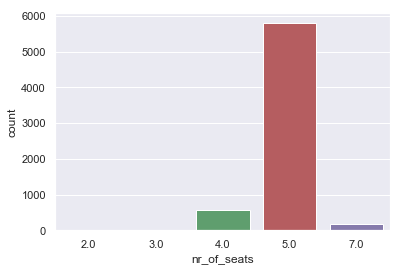

In [56]:
sns.countplot(df.nr_of_seats)

**TYPE**

In [57]:
df.type.unique()

array(['Used', "Employee's car", 'Demonstration', 'Pre-registered', 'New'],
      dtype=object)

In [58]:
df.type.value_counts(dropna=False)

Used              4607
Employee's car     756
Pre-registered     740
Demonstration      448
New                 16
Name: type, dtype: int64

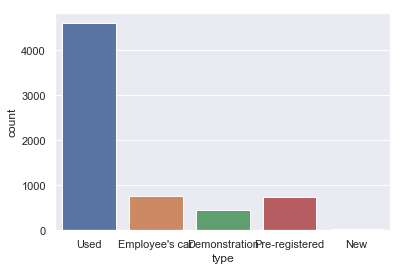

In [59]:
sns.countplot(df.type)

**DISPLACEMENT**

In [60]:
df.displacement.head()

0    1422.0
2    1598.0
4    1422.0
5    1598.0
6    1598.0
Name: displacement, dtype: float64

In [61]:
df.displacement.describe()

count     6567.000000
mean      1456.073550
std        328.567204
min        122.000000
25%       1364.000000
50%       1490.000000
75%       1598.000000
max      15898.000000
Name: displacement, dtype: float64

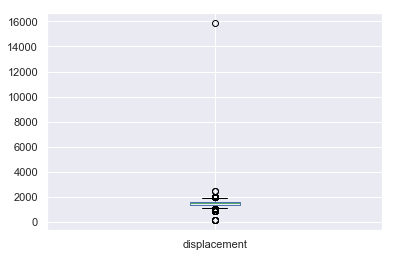

In [62]:
df.boxplot('displacement')

In [258]:
df.displacement[df.displacement>4000]

7169    15898.0
Name: displacement, dtype: float64

In [259]:
df = df.drop([7169])

In [260]:
df.displacement[df.displacement<800]

7809     139.0
7810     139.0
7811     139.0
7812     139.0
10194    122.0
Name: displacement, dtype: float64

In [261]:
df = df.drop([7809, 7810, 7811, 7812, 10194])

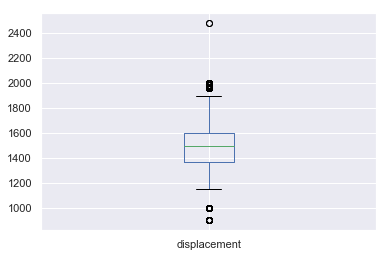

In [67]:
df.boxplot('displacement')

**NEXT_INSPECTION AND INSPECTION_NEW COLUMNS**

In [189]:
df.inspection_new.head()

0    1
2    0
4    1
5    0
6    1
Name: inspection_new, dtype: int64

**DUMMY COLUMNS**

In [262]:
dummy_prefixes = ['ss_', 'cc_', 'ext_', 'entertainment_']

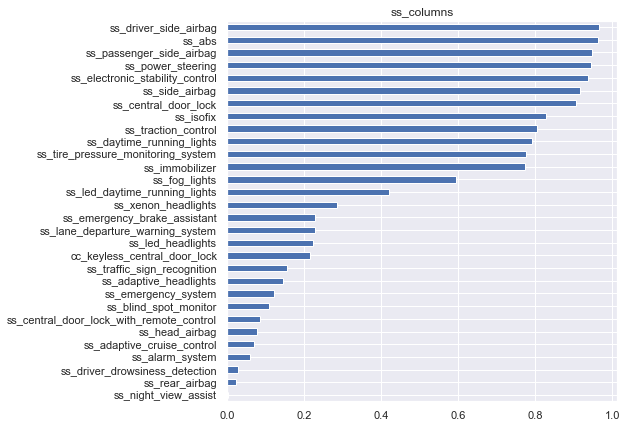

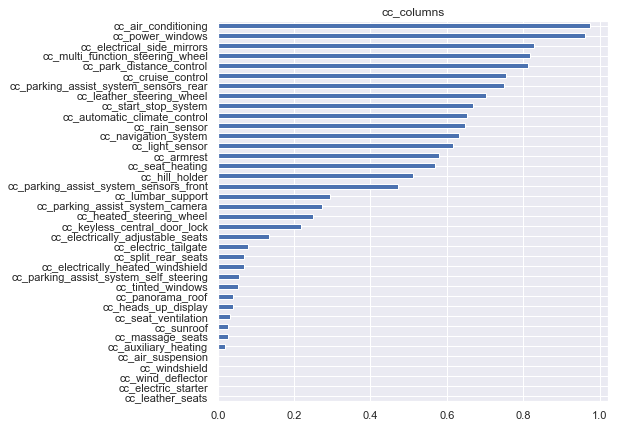

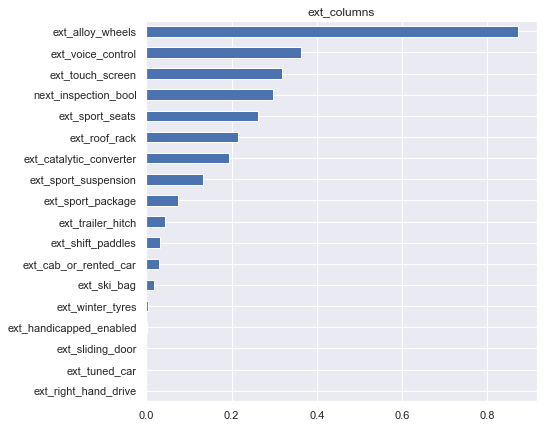

TypeError: Empty 'DataFrame': no numeric data to plot

In [263]:
# Percentage '1's in Dummy columns
for i in dummy_prefixes:
    df.filter(like = i, axis = 1).mean().sort_values().plot.barh(figsize=(7,7))
    plt.title(i + "columns")
    plt.show()

##>> There seems to be many properties which are not very common among cars
##>>> However, those properties might prove more significant since the ones -such as ABS- 
##>>>> of which almost all the cars have may not affect the price

**PROFILING**

In [71]:
import pandas_profiling

In [95]:
profile = pandas_profiling.ProfileReport(df)

In [96]:
profile.to_file(outputfile="outputfile.html")

In [154]:
#display(profile)

In [72]:
print(df['consumption_comb'].corr(df['co2_emission']))

0.9221412876695759


In [264]:
df.drop(['co2_emission'], axis=1, inplace=True)

In [74]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
description          object
body                 object
body_color           object
gearing_type         object
short_description    object
fuel                 object
type                 object
url                  object
dtype: object

In [265]:
df.drop(['description', 'short_description', 'url'], axis=1, inplace=True)

In [266]:
df= pd.get_dummies(df)

In [195]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [78]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,True,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,False,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,

In [267]:
df.drop(['next_inspection_bool'], axis=1, inplace=True)

In [80]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,

In [108]:
profile = pandas_profiling.ProfileReport(df)

In [109]:
profile.to_file(outputfile="outputfile.html")

In [ ]:
# According to profiling we drop cc_leather_seats', 'ext_right_hand_drive columns.

In [268]:
df.drop(['cc_leather_seats', 'ext_right_hand_drive'], axis=1, inplace=True)

In [198]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.

In [269]:
df.shape

(6561, 144)

In [270]:
# Create a new column with sum of dummy values (total number of car attributes)
df['ss_sum'] = df.filter(like="ss_").sum(axis=1)
df['cc_sum'] = df.filter(like="cc_").sum(axis=1)
df['ext_sum'] = df.filter(like="ext_").sum(axis=1)
df['ent_sum'] = df.filter(like="ent_").sum(axis=1)

In [87]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,ss_sum,cc_sum,ext_sum,ent_sum
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,14.0,16.0,3.0,4.0
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,12.0,13.0,2.0,2.0
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,

In [271]:
df.ss_sum.head()

0    14.0
2    12.0
4    13.0
5    15.0
6    13.0
Name: ss_sum, dtype: float64

In [272]:
import statsmodels.formula.api as sm 

In [ ]:
#let's make price column the last column.

In [474]:
temp=df['price']

In [475]:
temp2=df.drop(['price'], axis=1)

In [476]:
act=temp2.join(temp)

In [477]:
act.columns.get_loc('price')

147

In [478]:
df=act.copy()

In [479]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,ss_sum,cc_sum,ext_sum,ent_sum,price
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,14.0,16.0,3.0,4.0,15770
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,12.0,13.0,2.0,2.0,14640
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.

**MODEL**

In [606]:
X=df.drop(['price'], axis=1).values

In [607]:
X.shape

(6561, 147)

In [608]:
y=df['price'].values

In [609]:
y.shape

(6561,)

In [610]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [611]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [612]:
print(reg.score(X_test,y_test))

0.9010892071514285


In [613]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=10)
accuraries

array([0.87417253, 0.90394488, 0.91657384, 0.8803193 , 0.90697445,
       0.88997722, 0.89079588, 0.89741868, 0.91282971, 0.89206347])

In [614]:
accuraries.mean()

0.8965069957091767

**OLS**

In [615]:
X=np.append(arr=np.ones((6561, 1)).astype(int), values=X, axis=1)

In [616]:
reg_OLS=sm.OLS(y, X).fit()

In [575]:
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     367.9
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:39:08   Log-Likelihood:                -47514.
No. Observations:                5248   AIC:                         9.530e+04
Df Residuals:                    5113   BIC:                         9.618e+04
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6616.0291    432.754     15.288      0.000    5767.647    7464.411
x1            -0.9257      0.342     -2.711      0.007      -1.595      -0.256
x2            85.1148      3.627     23.466      0.000      78.004      92.226
x3            -0.0347      0.002    -23.111      0.000      -0.038      -0.032
x4           529.3088    201.677      2.625      0.009     133.935     924.683
x5          -189.3993    137.674     -1.376      0.169    -459.299      80.500
x6           262.9168    110.983      2.369      0.018      45.343     480.491
x7           885.6406    138.447      6.397      0.000     614.225    1157.057
x8          -719.2919    154.356     -4.660      0.000   -1021.895    -416.689
x9          -227.4493    137.633     -1.653      0.098    -497.270      42.371
x10          475.4617    173.071      2.747      0.006     136.168     814.756
x11         -432.8541    100.185     -4.321      0.000    -629.259    -236.449
x12         -250.5637    203.110     -1.234      0.217    -648.746     147.619
x13          -21.7667    249.584     -0.087      0.931    -511.057     467.524
x14         -519.4112    158.424     -3.279      0.001    -829.991    -208.832
x15          292.4103    110.164      2.654      0.008      76.442     508.379
x16         -614.2541    114.328     -5.373      0.000    -838.386    -390.122
x17         -101.1511     79.238     -1.277      0.202    -256.491      54.189
x18         -116.1089    186.358     -0.623      0.533    -481.449     249.232
x19         -377.5821     94.967     -3.976      0.000    -563.758    -191.406
x20         -301.5934    108.905     -2.769      0.006    -515.094     -88.093
x21          -90.4430     85.701     -1.055      0.291    -258.453      77.567
x22          434.6477    101.770      4.271      0.000     235.136     634.160
x23          348.2070    121.787      2.859      0.004     109.453     586.961
x24         1890.9323    576.552      3.280      0.001     760.644    3021.220
x25         -156.2630    218.293     -0.716      0.474    -584.211     271.685
x26         -816.9939    161.502     -5.059      0.000   -1133.606    -500.381
x27         -176.5298    218.246     -0.809      0.419    -604.386     251.326
x28           -9.2017    165.506     -0.056      0.956    -333.664     315.261
x29          210.1864     98.563      2.133      0.033      16.961     403.411
x30          318.6778     97.263      3.276      0.001     128.000     509.355
x31          -78.1746    129.565     -0.603      0.546    -332.178     175.829
x32         -326.5237     94.350     -3.461      0.001    -511.491    -141.556
x33          203.6071     87.141      2.337      0.020      32.774     374.440
x34          -78.6862     74.441     -1.057      0.291    -224.622      67.250
x35        -1776.7010     55.034    -32.284      0.000   -1884.591   -1668.811
x3

In [617]:
list=[]
for i in reg_OLS.pvalues:
    if i <0.05:
      list.append(i)

In [618]:
len(list)

79

In [620]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [621]:
X_opt=backwardElimination(X, 0.05)

In [622]:
X_opt.shape

(6561, 87)

**X_opt MODEL**

In [633]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_opt, y, test_size=0.2, random_state=0)

In [634]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [635]:
print(reg.score(X_test2,y_test2))

0.9019125181822953


In [631]:
from sklearn.model_selection import cross_val_score
accuraries2 = cross_val_score(estimator=reg, X=X_train2, y=y_train2, cv=10)
accuraries2

array([0.87669223, 0.90552481, 0.91750359, 0.88003538, 0.90921965,
       0.89206658, 0.88960797, 0.89990641, 0.91510484, 0.89455963])

In [636]:
print(accuraries2.mean())

0.8980221085115534


**Backward Elimination**

In [673]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [648]:
X_opt.shape

(6561, 87)

In [ ]:
# There are 87 columns in optimum dataframe. One of them is constant value. So we will define 86 columns.

In [678]:
X=df.drop(['price'], axis=1)

In [679]:
y=df['price']

In [683]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['displacement', 'hp', 'km', 'ss_abs', 'ss_alarm_system', 'ss_blind_spot_monitor', 'ss_central_door_lock', 'ss_central_door_lock_with_remote_control', 'ss_daytime_running_lights', 'ss_electronic_stability_control', 'ss_emergency_brake_assistant', 'ss_emergency_system', 'ss_fog_lights', 'ss_immobilizer', 'ss_isofix', 'ss_led_headlights', 'ss_lane_departure_warning_system', 'ss_night_view_assist', 'ss_power_steering', 'ss_traction_control', 'ss_xenon_headlights', 'consumption_comb', 'age', 'ent_media_cd_player', 'ent_media_digital_radio', 'ent_media_mp3', 'ent_media_radio', 'nr_of_doors', 'cc_armrest', 'cc_auxiliary_heating', 'cc_cruise_control', 'cc_heads_up_display', 'cc_keyless_central_door_lock', 'cc_lumbar_support', 'cc_massage_seats', 'cc_multi_function_steering_wheel', 'cc_panorama_roof', 'cc_park_distance_control', 'cc_parking_assist_system_camera', 'cc_parking_assist_system_self_steering', 'cc_parking_assist_system_sensors_rear', 'cc_power_windows', 'cc_rain_sensor', 'cc_seat_ve

In [684]:
len(cols)

86